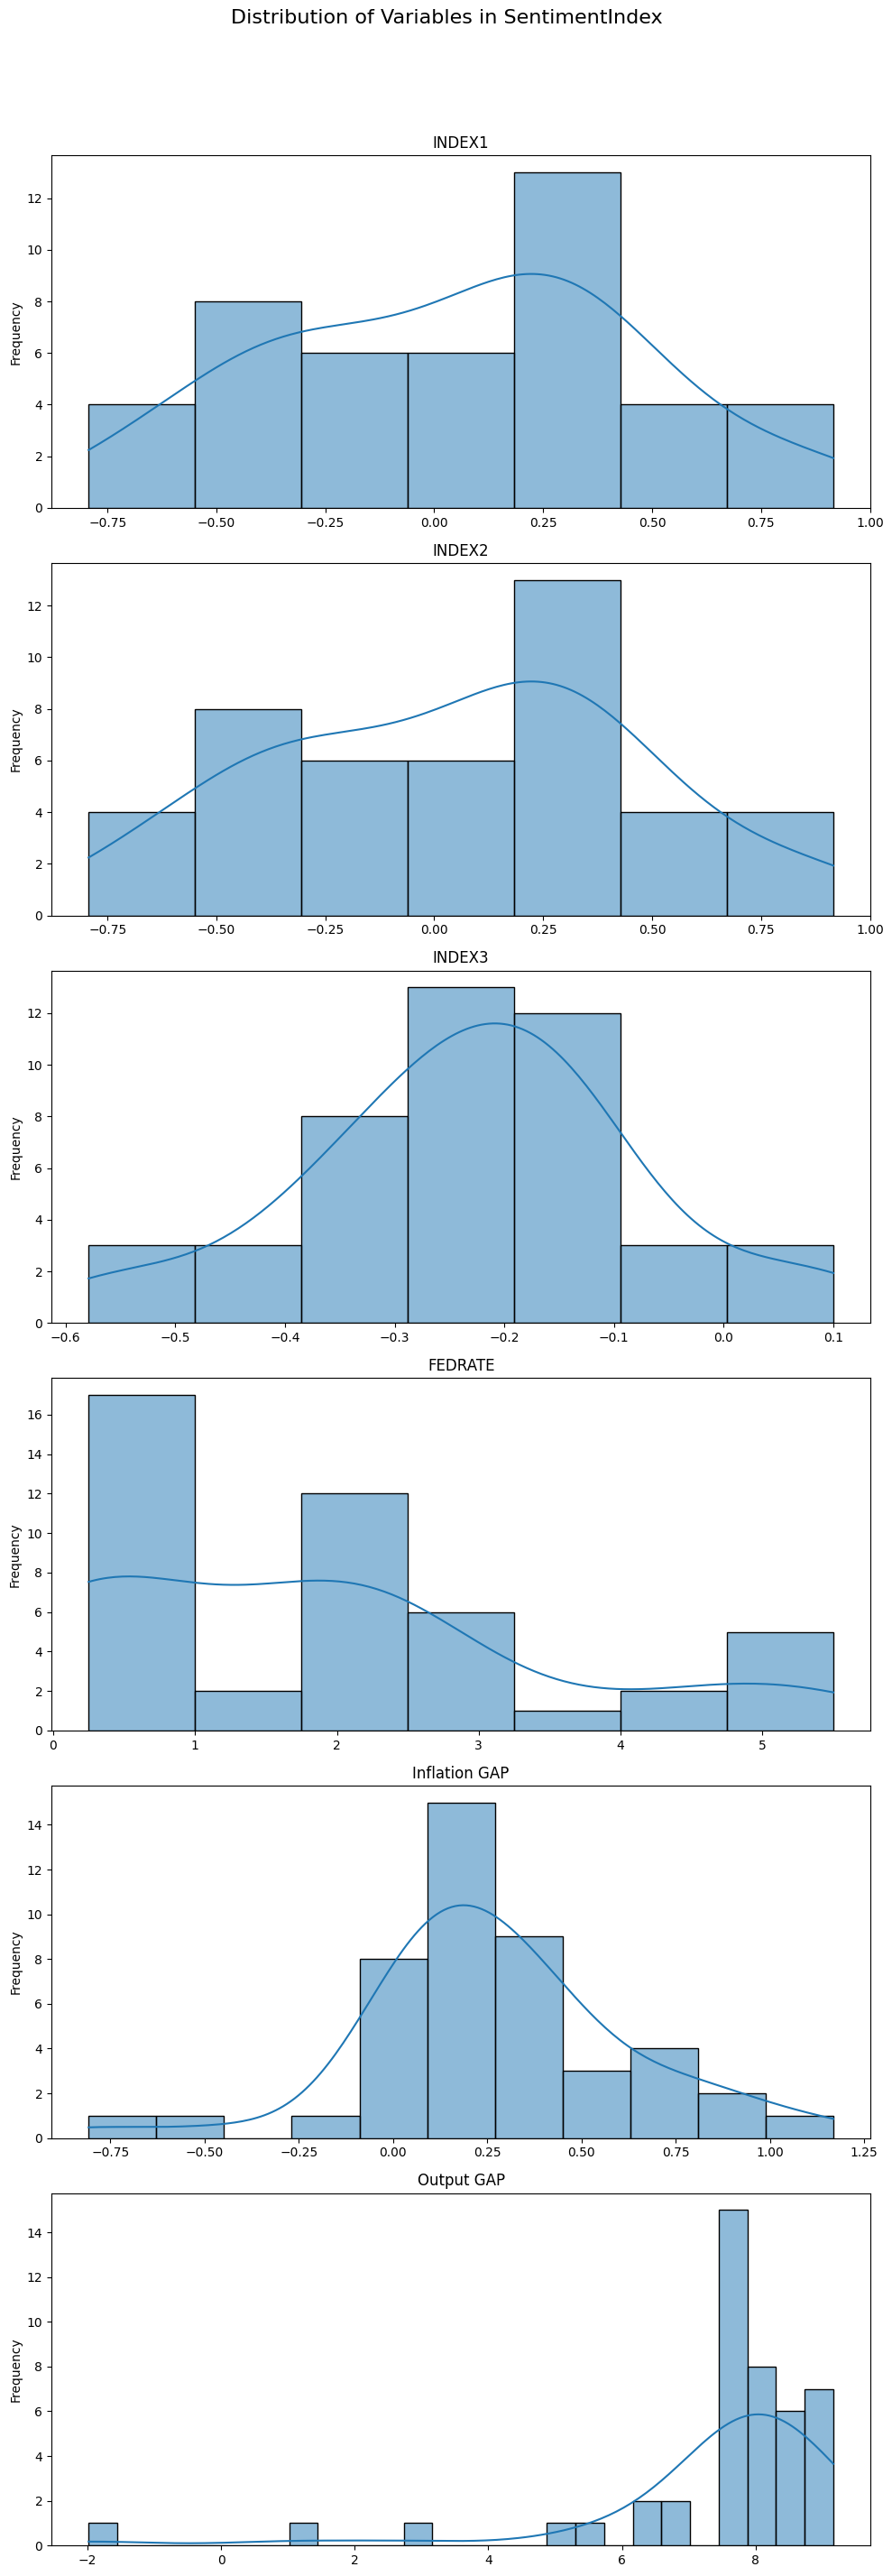

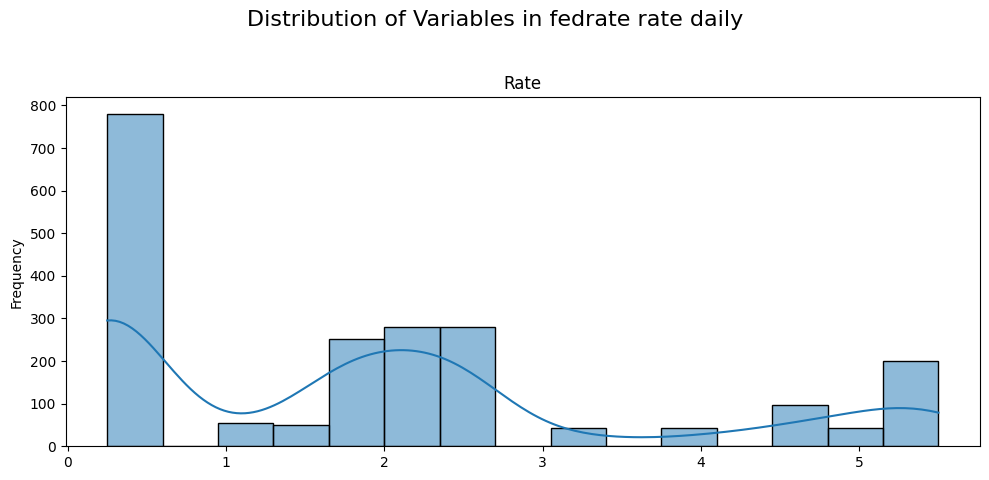

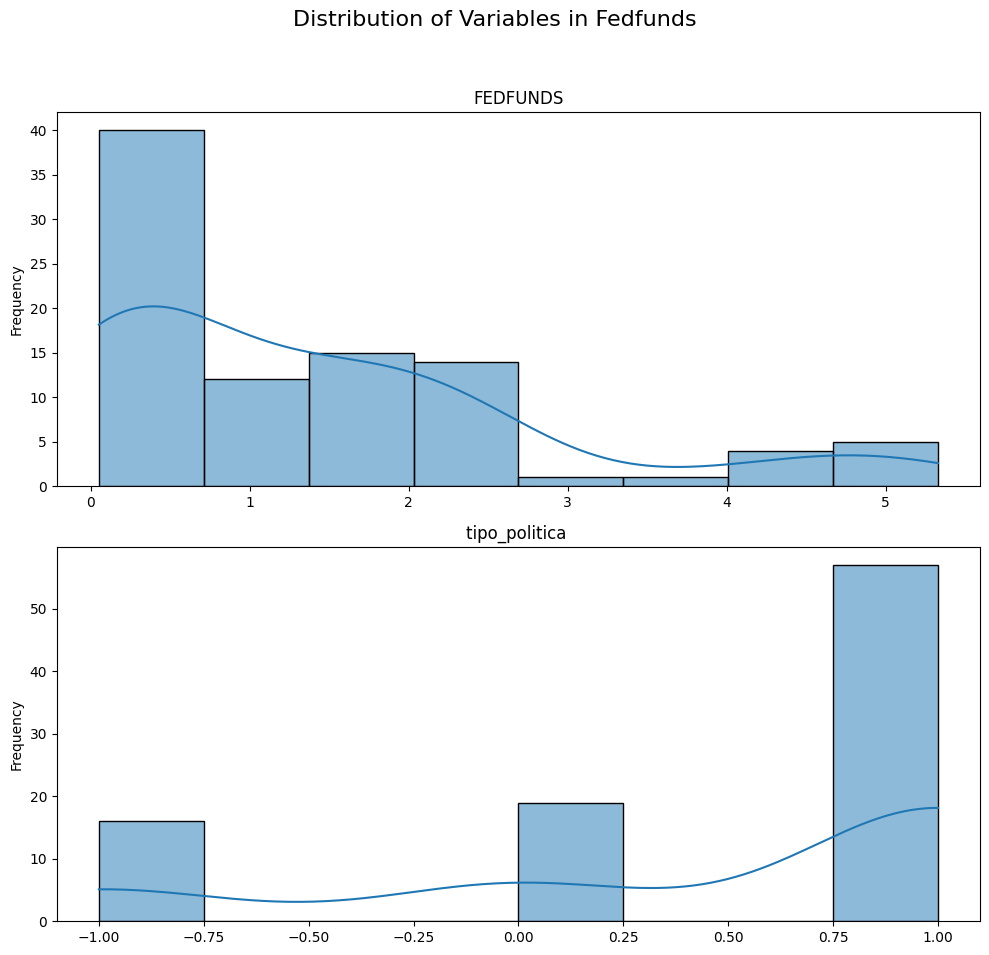

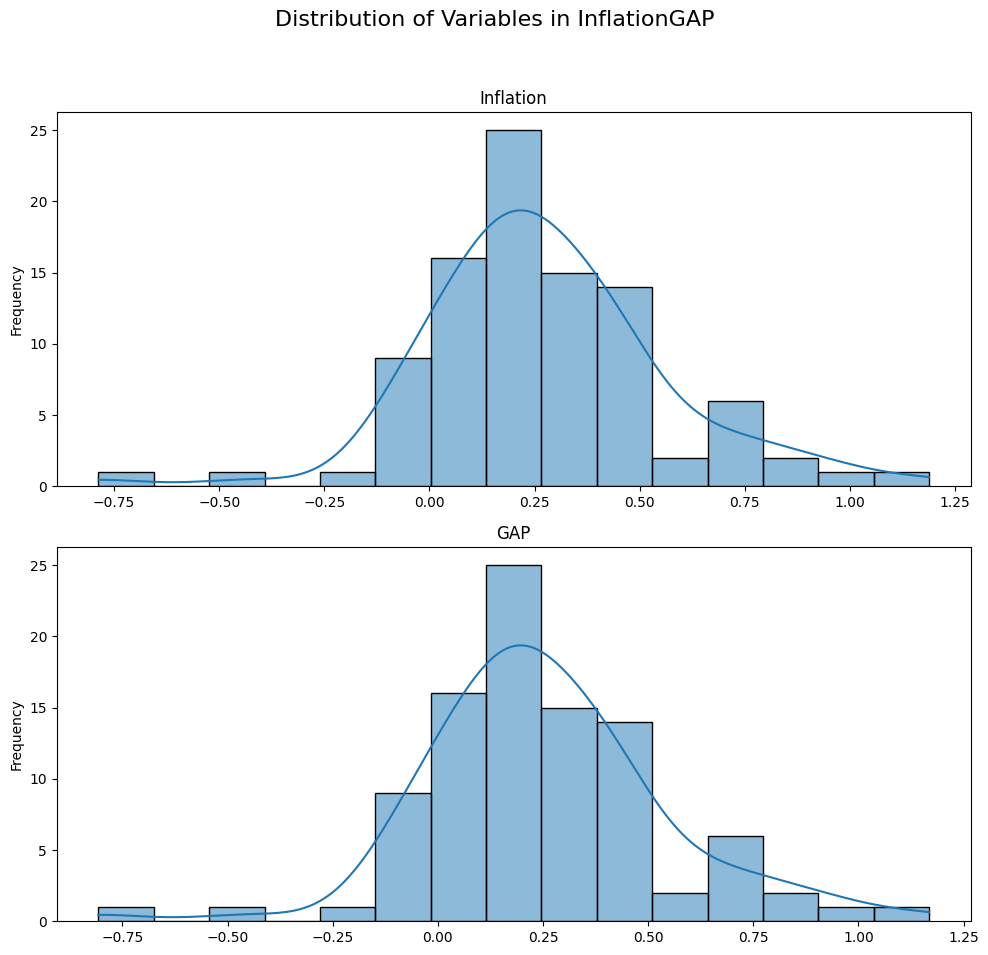

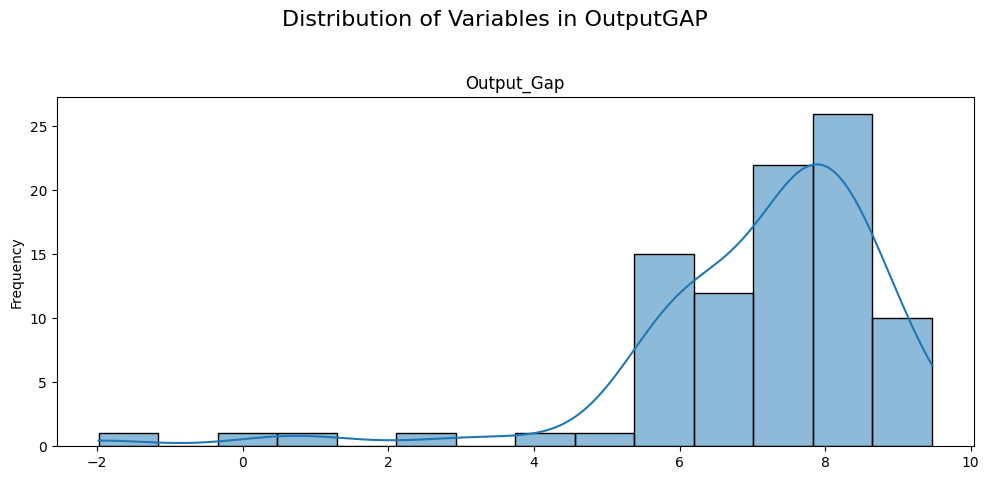

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Data LSTM and Pronostic.xlsx'
xlsx = pd.ExcelFile(file_path)

# Cargando todas las hojas del archivo Excel
sheets = {sheet_name: pd.read_excel(xlsx, sheet_name) for sheet_name in xlsx.sheet_names}

# Creando un resumen de las hojas
summary = {}
for sheet_name, df in sheets.items():
    summary[sheet_name] = {
        'Num Observations': df.shape[0],
        'Num Variables': df.shape[1],
        'Missing Values': df.isnull().sum().sum(),
        'Variable Types': df.dtypes.to_dict()
    }

# Resumen de la calidad de los datos (valores faltantes y duplicados)
quality_summary = {}
for sheet_name, df in sheets.items():
    quality_summary[sheet_name] = {
        'Missing Values': df.isnull().sum(),
        'Percentage Missing': (df.isnull().sum() / df.shape[0]) * 100,
        'Duplicate Rows': df.duplicated().sum()
    }

# Función corregida para crear histogramas de variables numéricas
def plot_histograms_corrected(df, sheet_name):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_cols = len(numeric_cols)
    fig, axes = plt.subplots(num_cols, 1, figsize=(10, 5 * num_cols), squeeze=False) # Asegurando que siempre es un array
    fig.suptitle(f'Distribution of Variables in {sheet_name}', fontsize=16)

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], ax=axes[i][0], kde=True)
        axes[i][0].set_title(col)
        axes[i][0].set_xlabel('')
        axes[i][0].set_ylabel('Frequency')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Creando histogramas para cada hoja, con la función corregida
for sheet_name, df in sheets.items():
    plot_histograms_corrected(df, sheet_name)
